### Data Preparation

In [8]:
import matplotlib.pyplot as plt
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_random_images(base_dir, category, num_images=3):
    category_dir = os.path.join(base_dir, category)
    image_files = random.sample(os.listdir(category_dir), num_images)

    plt.figure(figsize=(12, 4))
    for i, image_file in enumerate(image_files, 1):
        img_path = os.path.join(category_dir, image_file)
        plt.subplot(1, num_images, i)
        plt.imshow(mpimg.imread(img_path))
        plt.axis('off')
        plt.title(f"{category.capitalize()} Image")

    plt.show()


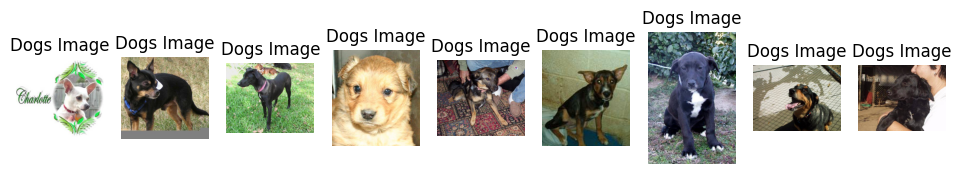

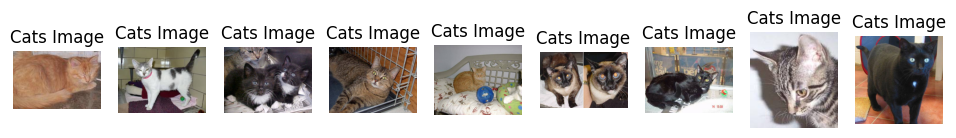

In [9]:
# Example usage:
train_dir = "dogscats/train"
visualize_random_images(train_dir, 'dogs', num_images=9)
visualize_random_images(train_dir, 'cats', num_images=9)

In [13]:
import tensorflow as tf


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "dogscats/train"
valid_dir = "dogscats/valid"

train_datagen = ImageDataGenerator(
    rotation_range = 20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator( preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical' 
)
validation_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Model Training 

### VGG16

In [17]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Flatten()(base_model.output)
model = Dense(512, activation='relu')(model)
model = Dense(128, activation='relu')(model)
model = Dense(2, activation='softmax')(model)
vgg_model = Model(inputs=base_model.input, outputs=model)
vgg_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

history = vgg_model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)


C:\Users\Client\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9171 - loss: 0.7525
Epoch 1: val_loss improved from inf to 0.23311, saving model to best_model.keras
719/719 ━━━━━━━━━━━━━━━━━━━━ 2041s 3s/step - accuracy: 0.9171 - loss: 0.7521 - val_accuracy: 0.9500 - val_loss: 0.2331
Epoch 2/5
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9578 - loss: 0.1326
Epoch 2: val_loss improved from 0.23311 to 0.09061, saving model to best_model.keras
719/719 ━━━━━━━━━━━━━━━━━━━━ 2166s 3s/step - accuracy: 0.9578 - loss: 0.1326 - val_accuracy: 0.9735 - val_loss: 0.0906
Epoch 3/5
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9696 - loss: 0.0869
Epoch 3: val_loss did not improve from 0.09061
719/719 ━━━━━━━━━━━━━━━━━━━━ 1998s 3s/step - accuracy: 0.9696 - loss: 0.0869 - val_accuracy: 0.9735 - val_loss: 0.1123
Epoch 4/5
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9759 - loss: 0.0652
Epoch 4: val_loss did not improve from 0.09061
719/719 ━━━━━━━━━━━━━━━━━━━━ 2466s 3s/step - ac

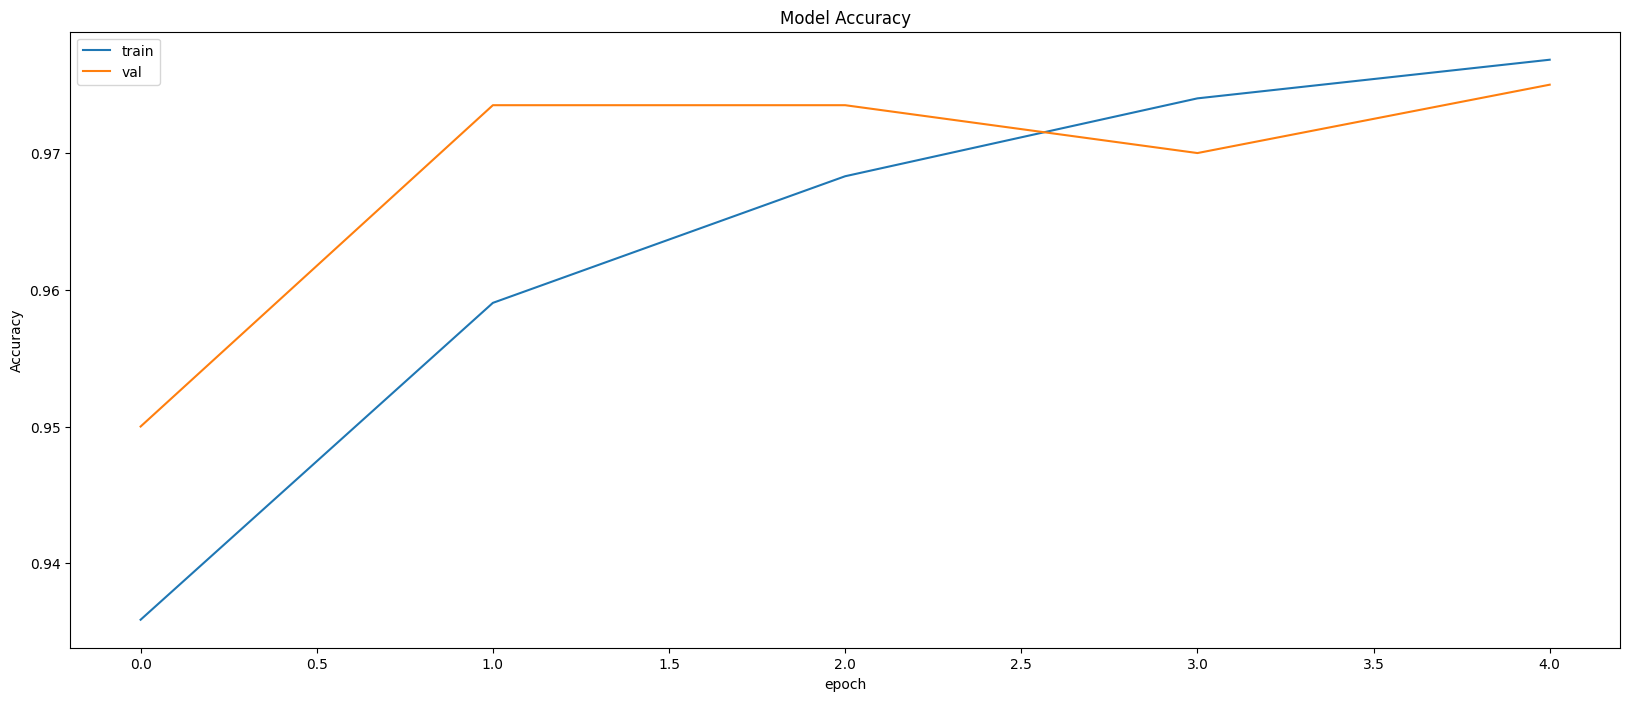

In [18]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### ResNet50

In [22]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
model = Flatten()(base_model.output)
model = Dense(512, activation='relu')(model)

model = Dense(128, activation='relu')(model)
model = Dense(2, activation='softmax')(model)
ResNet_model = Model(inputs=base_model.input, outputs=model)
ResNet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

history = ResNet_model.fit(
    train_generator,
    epochs=4, 
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

Epoch 1/4
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9405 - loss: 0.1862
Epoch 1: val_loss improved from inf to 0.05519, saving model to best_model.keras
719/719 ━━━━━━━━━━━━━━━━━━━━ 1782s 2s/step - accuracy: 0.9405 - loss: 0.1861 - val_accuracy: 0.9805 - val_loss: 0.0552
Epoch 2/4
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9717 - loss: 0.0716
Epoch 2: val_loss improved from 0.05519 to 0.05494, saving model to best_model.keras
719/719 ━━━━━━━━━━━━━━━━━━━━ 1365s 2s/step - accuracy: 0.9717 - loss: 0.0716 - val_accuracy: 0.9830 - val_loss: 0.0549
Epoch 3/4
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9790 - loss: 0.0561
Epoch 3: val_loss improved from 0.05494 to 0.05449, saving model to best_model.keras
719/719 ━━━━━━━━━━━━━━━━━━━━ 1378s 2s/step - accuracy: 0.9790 - loss: 0.0562 - val_accuracy: 0.9780 - val_loss: 0.0545
Epoch 4/4
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9764 - loss: 0.0572
Epoch 4: val_loss improved from 0.05449 to 0.04889, savi

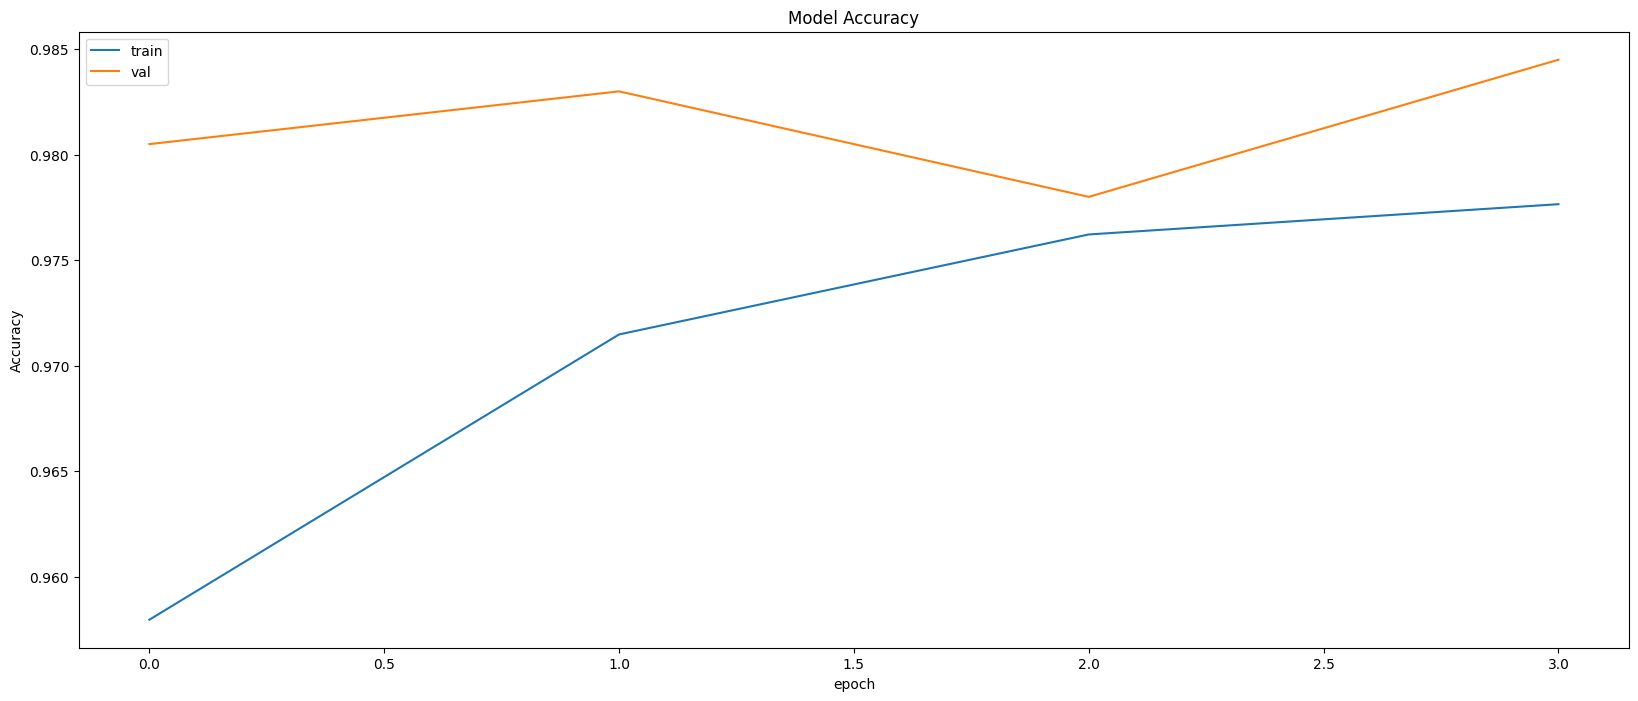

In [23]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### InceptionV3

In [24]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

InceptionV3_model = Model(inputs=base_model.input, outputs=output)
InceptionV3_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
# Train the model using fit_generator
history = InceptionV3_model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

Epoch 1/5
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 801ms/step - accuracy: 0.5707 - loss: 2.7991
Epoch 1: val_loss improved from inf to 1.73185, saving model to best_model.keras
719/719 ━━━━━━━━━━━━━━━━━━━━ 629s 865ms/step - accuracy: 0.5708 - loss: 2.7974 - val_accuracy: 0.5350 - val_loss: 1.7318
Epoch 2/5
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 829ms/step - accuracy: 0.6117 - loss: 0.9543
Epoch 2: val_loss improved from 1.73185 to 1.31857, saving model to best_model.keras
719/719 ━━━━━━━━━━━━━━━━━━━━ 644s 895ms/step - accuracy: 0.6117 - loss: 0.9542 - val_accuracy: 0.5445 - val_loss: 1.3186
Epoch 3/5
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.6262 - loss: 0.8671
Epoch 3: val_loss improved from 1.31857 to 1.22569, saving model to best_model.keras
719/719 ━━━━━━━━━━━━━━━━━━━━ 626s 870ms/step - accuracy: 0.6262 - loss: 0.8671 - val_accuracy: 0.5505 - val_loss: 1.2257
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


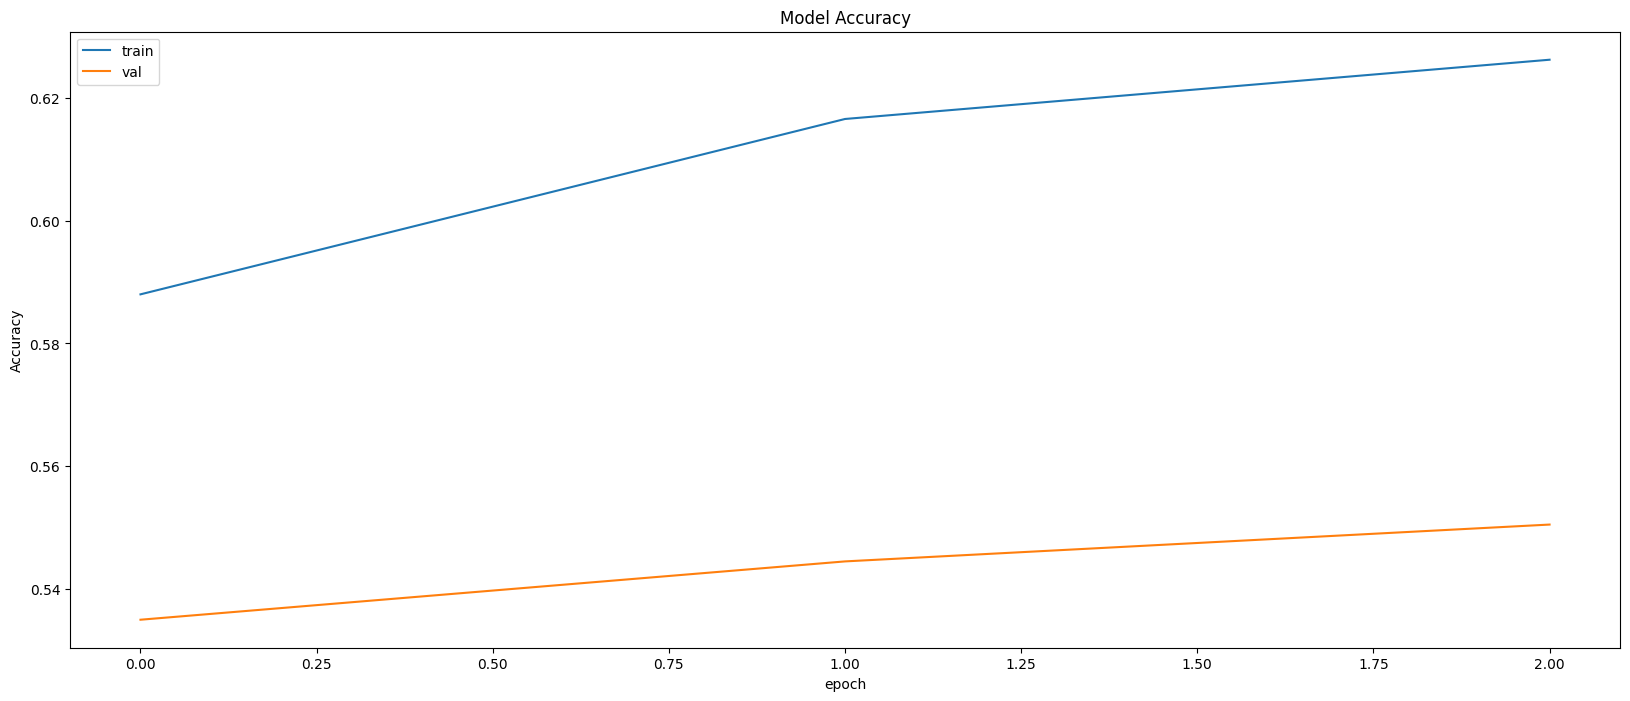

In [25]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()